In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [2]:
n=16

import random
def random_01str(list):
    for i in range(n):
        list.append(random.randint(0,1))

#Alice
alice_1=[]
random_01str(alice_1)
print("0 or 1 qubit : {}".format(alice_1))

alice_2=[]
random_01str(alice_2)
print("Z or X basis : {}".format(alice_2))

for j in range(n):
    if not alice_1[j] and (not alice_2[j]):
        print("Alice create |0> photon")
    elif alice_1[j] and (not alice_2[j]):
        print("Alice create |1> photon")
    elif not alice_1[j] and alice_2[j]:
        print("Alice create |+> photon")
    elif alice_1[j] and alice_2[j]:
        print("Alice create |-> photon")

0 or 1 qubit : [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
Z or X basis : [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]
Alice create |-> photon
Alice create |1> photon
Alice create |+> photon
Alice create |0> photon
Alice create |1> photon
Alice create |0> photon
Alice create |+> photon
Alice create |-> photon
Alice create |0> photon
Alice create |1> photon
Alice create |+> photon
Alice create |-> photon
Alice create |-> photon
Alice create |+> photon
Alice create |1> photon
Alice create |-> photon


In [3]:
#Alice

# Create a Quantum Register with n qubits.
q = QuantumRegister(n,'q')

# Create a Quantum Circuit acting on the q register
A_circ = QuantumCircuit(q)

for i in range(n):
    if alice_1[i]==1:
        A_circ.x(q[i])
        
for j in range(n):
    if alice_2[j]==1:
        A_circ.h(q[j])

A_circ.barrier(q)
A_circ.draw()

In [4]:
#Bob
bob_1=[]

bob_2=[]
random_01str(bob_2)
print("measured by Z(0) or X(1) : {}".format(bob_2))

for i in range(n):
    if not bob_2[i]:
        print("Bob uses Z basis to measure qubit{}".format(i))
    else:
        print("Bob uses X basis to measure qubit{}".format(i))

measured by Z(0) or X(1) : [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
Bob uses Z basis to measure qubit0
Bob uses Z basis to measure qubit1
Bob uses X basis to measure qubit2
Bob uses X basis to measure qubit3
Bob uses Z basis to measure qubit4
Bob uses Z basis to measure qubit5
Bob uses Z basis to measure qubit6
Bob uses Z basis to measure qubit7
Bob uses X basis to measure qubit8
Bob uses X basis to measure qubit9
Bob uses Z basis to measure qubit10
Bob uses X basis to measure qubit11
Bob uses Z basis to measure qubit12
Bob uses Z basis to measure qubit13
Bob uses Z basis to measure qubit14
Bob uses Z basis to measure qubit15


In [5]:
#Bob
c = ClassicalRegister(n,'c')
B_circ = QuantumCircuit(q,c)

for i in range(n):
    if bob_2[i]==1:
        B_circ.h(q[i])

B_circ.measure(q,c)
qc = A_circ + B_circ
qc.draw()

In [6]:
from qiskit import IBMQ
api_token = ''
IBMQ.enable_account(api_token)
backend_list = IBMQ.backends()
print(backend_list)
backend_sim = IBMQ.get_backend('ibmq_qasm_simulator')

[<IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_yorktown_testing') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]


{'0110111100011010': 1, '0101111100011011': 1, '1100101010011010': 1, '0101110000010010': 1, '0111100100011010': 1}


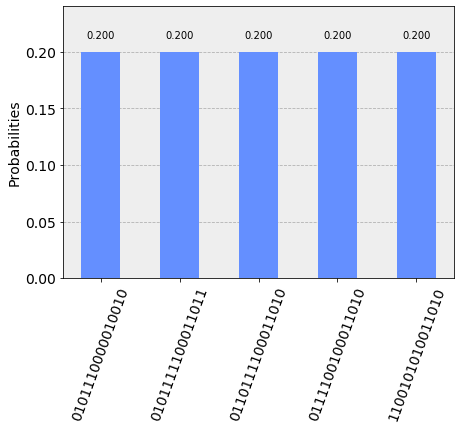

In [7]:
job_sim = qiskit.execute(qc, backend_sim, shots=5)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
result_str = list(counts)[0]
print("IBMQ_result = {}".format(result_str))

bob_1.clear()
for i in range(n):
    bob_1.append(int(result_str[n-1-i]))
    
print("Bob_result = {}".format(bob_1))

IBMQ_result = 0110111100011010
Bob_result = [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]


In [9]:
key1=[]
pos=[]
for i in range(n):
    if alice_2[i]==bob_2[i]:
        key1.append(bob_1[i])
        pos.append(i)

print("the same basis : {}".format(pos))
print("key1 = {}".format(key1))

key2=key1

the same basis : [1, 2, 4, 5, 11, 14]
key1 = [1, 0, 1, 0, 1, 1]


In [10]:
#Check
print("key1 = {}".format(key2))
print("the same basis : {}".format(pos))
num=len(key2)
total_times=len(key2)//2
right_times = 0

for i in range(total_times):
    rand=random.randint(0,num-1)
    if alice_1[pos[rand]]==bob_1[pos[rand]]:
        right_times+=1
        print("check pos = {}, ".format(pos[rand]),end=' ')
        print("Alice {} = Bob {}".format(alice_1[pos[rand]],bob_1[pos[rand]]))
    else :
        print("check pos = {}".format(pos[rand]),end=' ')
        print("Alice {} != Bob {}".format(alice_1[pos[rand]],bob_1[pos[rand]]))
        print("different qubit has been found")
    #print("rand = {}".format(rand),end=' ')
    #print("check pos = {}".format(pos[rand]))
    del key2[rand]
    del pos[rand]
    num-=1
    
print("key2 = {}".format(key2))
acc=(right_times/total_times)
print("accuracy = {}%".format(acc*100))   

key1 = [1, 0, 1, 0, 1, 1]
the same basis : [1, 2, 4, 5, 11, 14]
check pos = 1,  Alice 1 = Bob 1
check pos = 2,  Alice 0 = Bob 0
check pos = 14,  Alice 1 = Bob 1
key2 = [1, 0, 1]
accuracy = 100.0%


In [11]:
#Eve

eve_2=[]
random_01str(eve_2)
print("measured by Z(0) or X(1) : {}".format(eve_2))

for i in range(n):
    if not eve_2[i]:
        print("Eve uses Z basis to measure qubit{}".format(i))
    else:
        print("Eve uses X basis to measure qubit{}".format(i))

measured by Z(0) or X(1) : [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Eve uses X basis to measure qubit0
Eve uses Z basis to measure qubit1
Eve uses X basis to measure qubit2
Eve uses X basis to measure qubit3
Eve uses X basis to measure qubit4
Eve uses Z basis to measure qubit5
Eve uses X basis to measure qubit6
Eve uses X basis to measure qubit7
Eve uses X basis to measure qubit8
Eve uses X basis to measure qubit9
Eve uses X basis to measure qubit10
Eve uses X basis to measure qubit11
Eve uses X basis to measure qubit12
Eve uses X basis to measure qubit13
Eve uses X basis to measure qubit14
Eve uses X basis to measure qubit15


In [12]:
#Eve
for j in range(n):
    if not alice_1[j] and (not alice_2[j]):
        print("Alice create |0> photon, ",end='')
        if not eve_2[j]:
            print("Eve uses Z basis to measure, |0> is still |0>.")
            print()
        elif eve_2[j]:
            print("Eve uses X basis to measure, |0> is changed to |+>  |->.")
            print()
    elif alice_1[j] and (not alice_2[j]):
        print("Alice create |1> photon, ",end='')
        if not eve_2[j]:
            print("Eve uses Z basis to measure, |1> is still |1>.")
            print()
        elif eve_2[j]:
            print("Eve uses X basis to measure, |1> is changed to |+>  |->.")
            print()
    elif not alice_1[j] and alice_2[j]:
        print("Alice create |+> photon, ",end='')
        if not eve_2[j]:
            print("Eve uses Z basis to measure, |+> is changed to |0>  |1>.")
            print()
        elif eve_2[j]:
            print("Eve uses X basis to measure, |+> is still |+>.")
            print()
    elif alice_1[j] and alice_2[j]:
        print("Alice create |-> photon, ",end='')
        if not eve_2[j]:
            print("Eve uses Z basis to measure, |-> is changed to |0>  |1>.")
            print()
        elif eve_2[j]:
            print("Eve uses X basis to measure, |-> is still |->.")
            print()

Alice create |-> photon, Eve uses X basis to measure, |-> is still |->.

Alice create |1> photon, Eve uses Z basis to measure, |1> is still |1>.

Alice create |+> photon, Eve uses X basis to measure, |+> is still |+>.

Alice create |0> photon, Eve uses X basis to measure, |0> is changed to |+>  |->.

Alice create |1> photon, Eve uses X basis to measure, |1> is changed to |+>  |->.

Alice create |0> photon, Eve uses Z basis to measure, |0> is still |0>.

Alice create |+> photon, Eve uses X basis to measure, |+> is still |+>.

Alice create |-> photon, Eve uses X basis to measure, |-> is still |->.

Alice create |0> photon, Eve uses X basis to measure, |0> is changed to |+>  |->.

Alice create |1> photon, Eve uses X basis to measure, |1> is changed to |+>  |->.

Alice create |+> photon, Eve uses X basis to measure, |+> is still |+>.

Alice create |-> photon, Eve uses X basis to measure, |-> is still |->.

Alice create |-> photon, Eve uses X basis to measure, |-> is still |->.

Alice creat

In [13]:
#Eve
q2 = QuantumRegister(n,'q2')
E_circ = QuantumCircuit(q2)

for i in range(n):
    if alice_2[i]==eve_2[i]:
        if alice_1[i]==1:
            E_circ.x(q2[i])
        if alice_2[i]==1:
            E_circ.h(q2[i])
    else :
        if alice_2[i]==0 and eve_2[i]==1:
            rand2 = random.randint(0,1)
            if not rand2:
                E_circ.h(q2[i])
            else :
                E_circ.x(q2[i])
                E_circ.h(q2[i])
        elif alice_2[i]==1 and eve_2[i]==0:
            rand2 = random.randint(0,1)
            if rand2:
                E_circ.x(q2[i])

                
E_circ.barrier(q2)
E_circ.draw()

In [14]:
#After Eve, sended to Bob

c2 = ClassicalRegister(n,'c2')
B_circ2 = QuantumCircuit(q2,c2)

for i in range(n):
    if bob_2[i]==1:
        B_circ2.h(q2[i])

B_circ2.measure(q2,c2)
qc2 = E_circ + B_circ2
qc2.draw()

{'1001100111010011': 1, '1111110111000010': 1, '0000110111000011': 1, '0111110110010011': 1, '1111100111000011': 1}


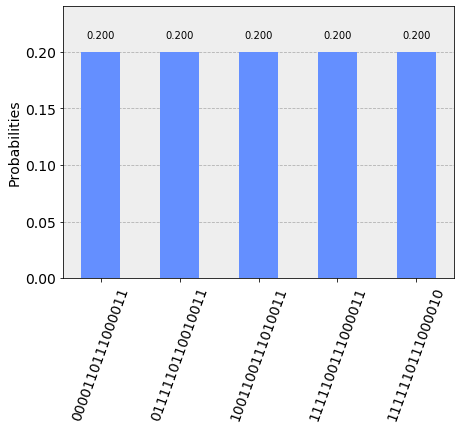

In [15]:
job_sim2 = qiskit.execute(qc2, backend_sim, shots=5)
result_sim2 = job_sim2.result()
counts2 = result_sim2.get_counts(qc2)
print(counts2)
from qiskit.visualization import plot_histogram
plot_histogram(counts2)

In [16]:
result_str2 = list(counts2)[0]
print("IBMQ_result2 = {}".format(result_str2))

bob_1.clear()
for i in range(n):
    bob_1.append(int(result_str2[n-1-i]))
    
print("Bob_result2 = {}".format(bob_1))

IBMQ_result2 = 1001100111010011
Bob_result2 = [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1]


In [19]:
key1_2=[]
pos2=[]
for i in range(n):
    if alice_2[i]==bob_2[i]:
        key1_2.append(bob_1[i])
        pos2.append(i)

print("the same basis : {}".format(pos2))
print("key1_2 = {}".format(key1_2))

key2_2=[]
key2_2.clear()
key2_2.extend(key1_2)

the same basis : [1, 2, 4, 5, 11, 14]
key1_2 = [1, 0, 1, 0, 1, 0]


In [20]:
#Check
print("key1_2 = {}".format(key2_2))
print("the same basis : {}".format(pos2))
num2=len(key2_2)
total_times2=len(key2_2)//2
right_times2 = 0

for i in range(total_times2):
    rand=random.randint(0,num2-1)
    if alice_1[pos2[rand]]==bob_1[pos2[rand]]:
        right_times2+=1
        print("check pos = {}, ".format(pos2[rand]),end=' ')
        print("Alice {} = Bob {}".format(alice_1[pos2[rand]],bob_1[pos2[rand]]))
    else :
        print("check pos = {}".format(pos2[rand]),end=' ')
        print("Alice {} != Bob {}".format(alice_1[pos2[rand]],bob_1[pos2[rand]]))
        print("different qubit has been found")
    #print("rand = {}".format(rand),end=' ')
    #print("check pos2 = {}".format(pos2[rand]))
    del key2_2[rand]
    del pos2[rand]
    num2-=1
    
print("key2_2 = {}".format(key2_2))
acc2=(right_times2/total_times2)
print("accuracy_2 = {}%".format(acc2*100))   

key1_2 = [1, 0, 1, 0, 1, 0]
the same basis : [1, 2, 4, 5, 11, 14]
check pos = 4,  Alice 1 = Bob 1
check pos = 2,  Alice 0 = Bob 0
check pos = 11,  Alice 1 = Bob 1
key2_2 = [1, 0, 0]
accuracy_2 = 100.0%


In [21]:
#Check all

key2_3=[]
pos3=[]
for i in range(n):
    if alice_2[i]==bob_2[i]:
        key2_3.append(bob_1[i])
        pos3.append(i)

print("the same basis : {}".format(pos3))
print("key2_3 = {}".format(key2_3))


print(key2_3)
print(pos3)
num3=len(key2_3)
total_times3=len(key2_3)
right_times3 = 0

for i in range(total_times3):
    rand=random.randint(0,num3-1)
    if alice_1[pos3[rand]]==bob_1[pos3[rand]]:
        right_times3+=1
        print("check pos = {} ".format(pos3[rand]),end=', ')
        print("Alice {} = Bob {}".format(alice_1[pos3[rand]],bob_1[pos3[rand]]))
    else :
        print("check pos = {} ".format(pos3[rand]),end=', ')
        print("Alice {} != Bob {}".format(alice_1[pos3[rand]],bob_1[pos3[rand]]))
        print("different qubit has been found")
    #print("rand = {}".format(rand),end=' ')
    #print("check pos2 = {}".format(pos2[rand]))
    del key2_3[rand]
    del pos3[rand]
    num3-=1
    
#print("key2_3 = {}".format(key2_3))
acc3=(right_times3/total_times3)
print("accuracy_3 = {}%".format(acc3*100))   

the same basis : [1, 2, 4, 5, 11, 14]
key2_3 = [1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0]
[1, 2, 4, 5, 11, 14]
check pos = 11 , Alice 1 = Bob 1
check pos = 2 , Alice 0 = Bob 0
check pos = 4 , Alice 1 = Bob 1
check pos = 5 , Alice 0 = Bob 0
check pos = 14 , Alice 1 != Bob 0
different qubit has been found
check pos = 1 , Alice 1 = Bob 1
accuracy_3 = 83.33333333333334%
